In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rc('font', size=10)

In [2]:
#palette_values2 =  ['#8FD7D7', '#00B0BE', '#FF8CAE', '#F45F74', '#BDD373', '#98C127', '#FFCD8E', '#FFB255', '#C17ADC', '#005D82']

palette_values2 =  ['#00B0BE', '#F45F74', '#98C127', '#FFCD8E', '#FFB255', '#C17ADC', '#005D82']
colors2 = sns.color_palette(palette_values2)
colors2

[(0.0, 0.6901960784313725, 0.7450980392156863),
 (0.9568627450980393, 0.37254901960784315, 0.4549019607843137),
 (0.596078431372549, 0.7568627450980392, 0.15294117647058825),
 (1.0, 0.803921568627451, 0.5568627450980392),
 (1.0, 0.6980392156862745, 0.3333333333333333),
 (0.7568627450980392, 0.47843137254901963, 0.8627450980392157),
 (0.0, 0.36470588235294116, 0.5098039215686274)]

In [3]:
colors_antiviral = sns.color_palette(['#00B0BE', '#005D82', '#C17ADC'])
colors_hlp = sns.color_palette(['#00B0BE', '#FFCD8E'])
colors_peplife = sns.color_palette(['#00B0BE', '#FFB255'])
colors_plifepred = sns.color_palette(['#00B0BE', '#005D82'])
colors_serum = sns.color_palette(['#00B0BE', '#98C127'])

In [4]:
df_data = pd.read_csv("../../data/described/described_datasets.csv")
df_data.head()

,sequence,hl_category,half_life_seconds,length_sequence,dataset_name,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,...,freq_L,freq_M,freq_P,freq_Q,freq_R,freq_S,freq_T,freq_V,freq_W,freq_Y
0,AAAMSQVTN,Medium,15840.0,9,Antiviral_canon.csv,891.01,12.2500,0.00112,0.996,44.6000,...,0.0000,0.1111,0.0000,0.1111,0.0000,0.1111,0.1111,0.1111,0.0000,0.0000
1,AACEVAKNLNESLIDLQELGKYEQYIKW,Medium,15840.0,28,Antiviral_canon.csv,3268.71,4.6846,-0.00033,-1.068,46.1643,...,0.1429,0.0000,0.0000,0.0714,0.0000,0.0357,0.0000,0.0357,0.0357,0.0714
2,AAGAVVNDL,Medium,15840.0,9,Antiviral_canon.csv,827.93,6.5000,-0.00000,-0.004,-0.5444,...,0.1111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2222,0.0000,0.0000
3,AAHLIDALYAEFLGGRVLTT,Medium,15840.0,20,Antiviral_canon.csv,2130.46,7.6719,0.00005,0.096,23.2650,...,0.2000,0.0000,0.0000,0.0000,0.0500,0.0000,0.1000,0.0500,0.0000,0.0500
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,Medium,15840.0,45,Antiviral_canon.csv,4779.56,10.1865,0.00046,2.194,58.3624,...,0.1556,0.0000,0.0667,0.0222,0.0667,0.0444,0.0444,0.1111,0.0000,0.0444


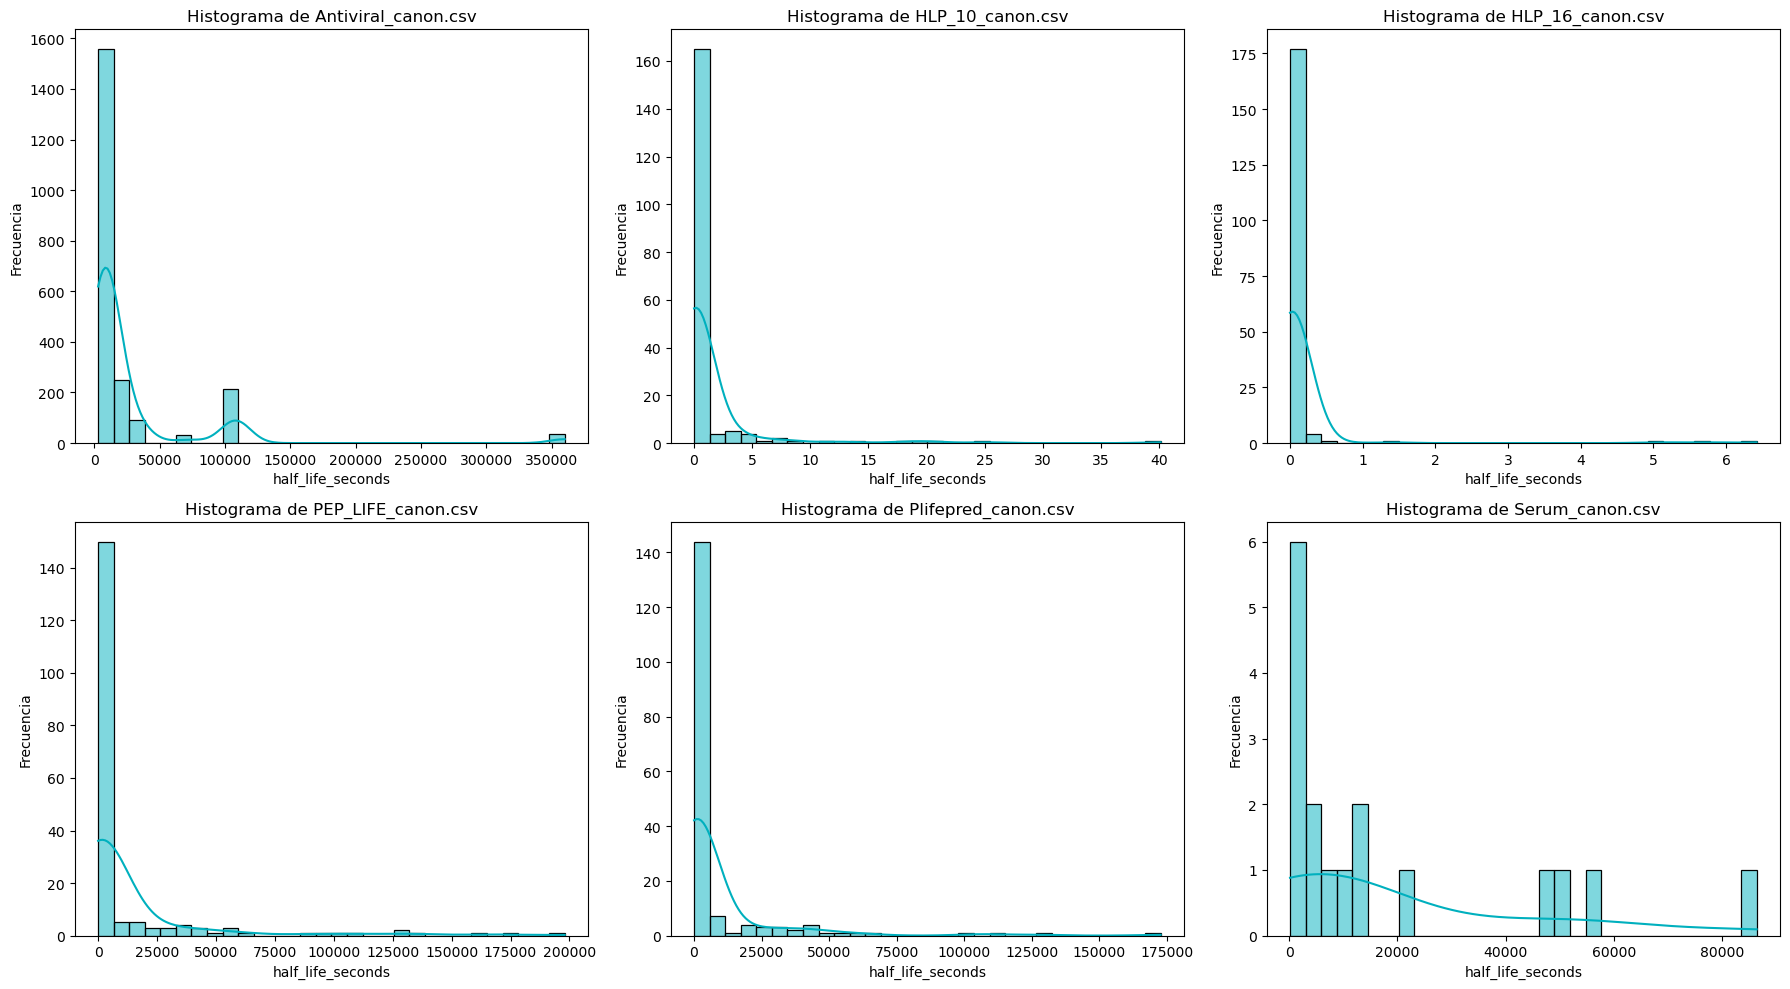

In [5]:
datasets = df_data['dataset_name'].unique()

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Generar un histograma por dataset
for i, dataset in enumerate(datasets):
    subset = df_data[df_data['dataset_name'] == dataset]
    sns.histplot(subset['half_life_seconds'], kde=True, ax=axes[i], bins=30, color='#00B0BE')
    axes[i].set_title(f'Histograma de {dataset}')
    axes[i].set_xlabel('half_life_seconds')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig("../../img/datasets/hist_datasets.png", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
df_data.columns

Index(['sequence', 'hl_category', 'half_life_seconds', 'length_sequence',
       'dataset_name', 'Molecular Weight', 'Isoelectric point',
       'Charge density', 'Charge', 'Instability index', 'Aromaticity',
       'Aliphatic index', 'Boman index', 'Hydrophobic ratio', 'freq_A',
       'freq_C', 'freq_D', 'freq_E', 'freq_F', 'freq_G', 'freq_H', 'freq_I',
       'freq_N', 'freq_K', 'freq_L', 'freq_M', 'freq_P', 'freq_Q', 'freq_R',
       'freq_S', 'freq_T', 'freq_V', 'freq_W', 'freq_Y'],
      dtype='object')

In [7]:
new_names = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'N', 'K', 'L', 'M', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
old_names = ['freq_A', 'freq_C', 'freq_D', 'freq_E', 'freq_F', 'freq_G', 'freq_H', 'freq_I', 'freq_N', 'freq_K', 'freq_L', 'freq_M',
                      'freq_P', 'freq_Q', 'freq_R', 'freq_S', 'freq_T', 'freq_V', 'freq_W', 'freq_Y']
df_data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [8]:
df_data

,sequence,hl_category,half_life_seconds,length_sequence,dataset_name,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,...,L,M,P,Q,R,S,T,V,W,Y
0,AAAMSQVTN,Medium,15840.0,9,Antiviral_canon.csv,891.01,12.2500,0.00112,0.996,44.6000,...,0.0000,0.1111,0.0000,0.1111,0.0000,0.1111,0.1111,0.1111,0.0000,0.0000
1,AACEVAKNLNESLIDLQELGKYEQYIKW,Medium,15840.0,28,Antiviral_canon.csv,3268.71,4.6846,-0.00033,-1.068,46.1643,...,0.1429,0.0000,0.0000,0.0714,0.0000,0.0357,0.0000,0.0357,0.0357,0.0714
2,AAGAVVNDL,Medium,15840.0,9,Antiviral_canon.csv,827.93,6.5000,-0.00000,-0.004,-0.5444,...,0.1111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2222,0.0000,0.0000
3,AAHLIDALYAEFLGGRVLTT,Medium,15840.0,20,Antiviral_canon.csv,2130.46,7.6719,0.00005,0.096,23.2650,...,0.2000,0.0000,0.0000,0.0000,0.0500,0.0000,0.1000,0.0500,0.0000,0.0500
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,Medium,15840.0,45,Antiviral_canon.csv,4779.56,10.1865,0.00046,2.194,58.3624,...,0.1556,0.0000,0.0667,0.0222,0.0667,0.0444,0.0444,0.1111,0.0000,0.0444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,SLRRSSCFGGRMDRIGAQSGLGCNSFRY,Low,156.0,28,Serum_canon.csv,3081.49,11.5215,0.00158,4.860,82.8750,...,0.0714,0.0357,0.0000,0.0357,0.1786,0.1786,0.0000,0.0000,0.0000,0.0357
2933,MCMPCFTTDHQMARKCDDCCGGKGRGKCYGPQCLCR,High,50400.0,36,Serum_canon.csv,4003.79,8.1262,0.00089,3.554,37.9083,...,0.0278,0.0833,0.0556,0.0556,0.0833,0.0000,0.0556,0.0000,0.0000,0.0278
2934,KRFKKFFKKVKKSVKKRLKKIFKKPMVIGVTIPF,Low,4260.0,34,Serum_canon.csv,4151.34,13.7578,0.00385,15.993,4.3206,...,0.0294,0.0294,0.0588,0.0000,0.0588,0.0294,0.0294,0.1176,0.0000,0.0000
2935,KRFKKFFKKVKKSV,Low,1260.0,14,Serum_canon.csv,1797.29,13.6016,0.00500,8.994,2.9786,...,0.0000,0.0000,0.0000,0.0000,0.0714,0.0714,0.0000,0.1429,0.0000,0.0000


In [9]:
columns_with_properties = ['Molecular Weight', 'Isoelectric point', 'Charge density', 'Charge',
       'Instability index', 'Aromaticity', 'Aliphatic index', 'Boman index',
       'Hydrophobic ratio']

In [10]:
list_df = []
for column in ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'N', 'K', 'L', 'M', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']:
    df_values = df_data[["dataset_name", column, "hl_category", "length_sequence"]]
    df_values.columns = ["dataset_name", "Percentage", "hl_category", "length_sequence"]
    df_values["Residue"] = column
    list_df.append(df_values)

df_process = pd.concat(list_df, axis=0)
df_process

,dataset_name,Percentage,hl_category,length_sequence,Residue
0,Antiviral_canon.csv,0.3333,Medium,9,A
1,Antiviral_canon.csv,0.1071,Medium,28,A
2,Antiviral_canon.csv,0.3333,Medium,9,A
3,Antiviral_canon.csv,0.2000,Medium,20,A
4,Antiviral_canon.csv,0.2000,Medium,45,A
...,...,...,...,...,...
2932,Serum_canon.csv,0.0357,Low,28,Y
2933,Serum_canon.csv,0.0278,High,36,Y
2934,Serum_canon.csv,0.0000,Low,34,Y
2935,Serum_canon.csv,0.0000,Low,14,Y


In [11]:
df_process["dataset_name"].unique()

array(['Antiviral_canon.csv', 'HLP_10_canon.csv', 'HLP_16_canon.csv',
       'PEP_LIFE_canon.csv', 'Plifepred_canon.csv', 'Serum_canon.csv'],
      dtype=object)

In [12]:
df_process_1 = df_process[(df_process["dataset_name"] == "Antiviral_canon.csv")]
df_process_2 = df_process[(df_process["dataset_name"] == "HLP_10_canon.csv")]
df_process_3 = df_process[(df_process["dataset_name"] == "HLP_16_canon.csv")]
df_process_4 = df_process[(df_process["dataset_name"] == "PEP_LIFE_canon.csv")]
df_process_5 = df_process[(df_process["dataset_name"] == "Plifepred_canon.csv")]
df_process_6 = df_process[(df_process["dataset_name"] == "Serum_canon.csv")]

In [13]:
hl_order = ["Low", "Medium", "High"]
df_process_1["hl_category"] = pd.Categorical(df_process_1["hl_category"], categories=hl_order, ordered=True)
df_process_2["hl_category"] = pd.Categorical(df_process_2["hl_category"], categories=hl_order, ordered=True)
df_process_3["hl_category"] = pd.Categorical(df_process_3["hl_category"], categories=hl_order, ordered=True)
df_process_4["hl_category"] = pd.Categorical(df_process_4["hl_category"], categories=hl_order, ordered=True)
df_process_5["hl_category"] = pd.Categorical(df_process_5["hl_category"], categories=hl_order, ordered=True)
df_process_6["hl_category"] = pd.Categorical(df_process_6["hl_category"], categories=hl_order, ordered=True)

In [14]:
list_dfs = [df_process_1, df_process_2, df_process_3, df_process_4, df_process_5, df_process_6]
list_tittle = ["Antiviral", "HLP_10", "HLP_16", "PEP_LIFE", "Plifepred", "Serum"]

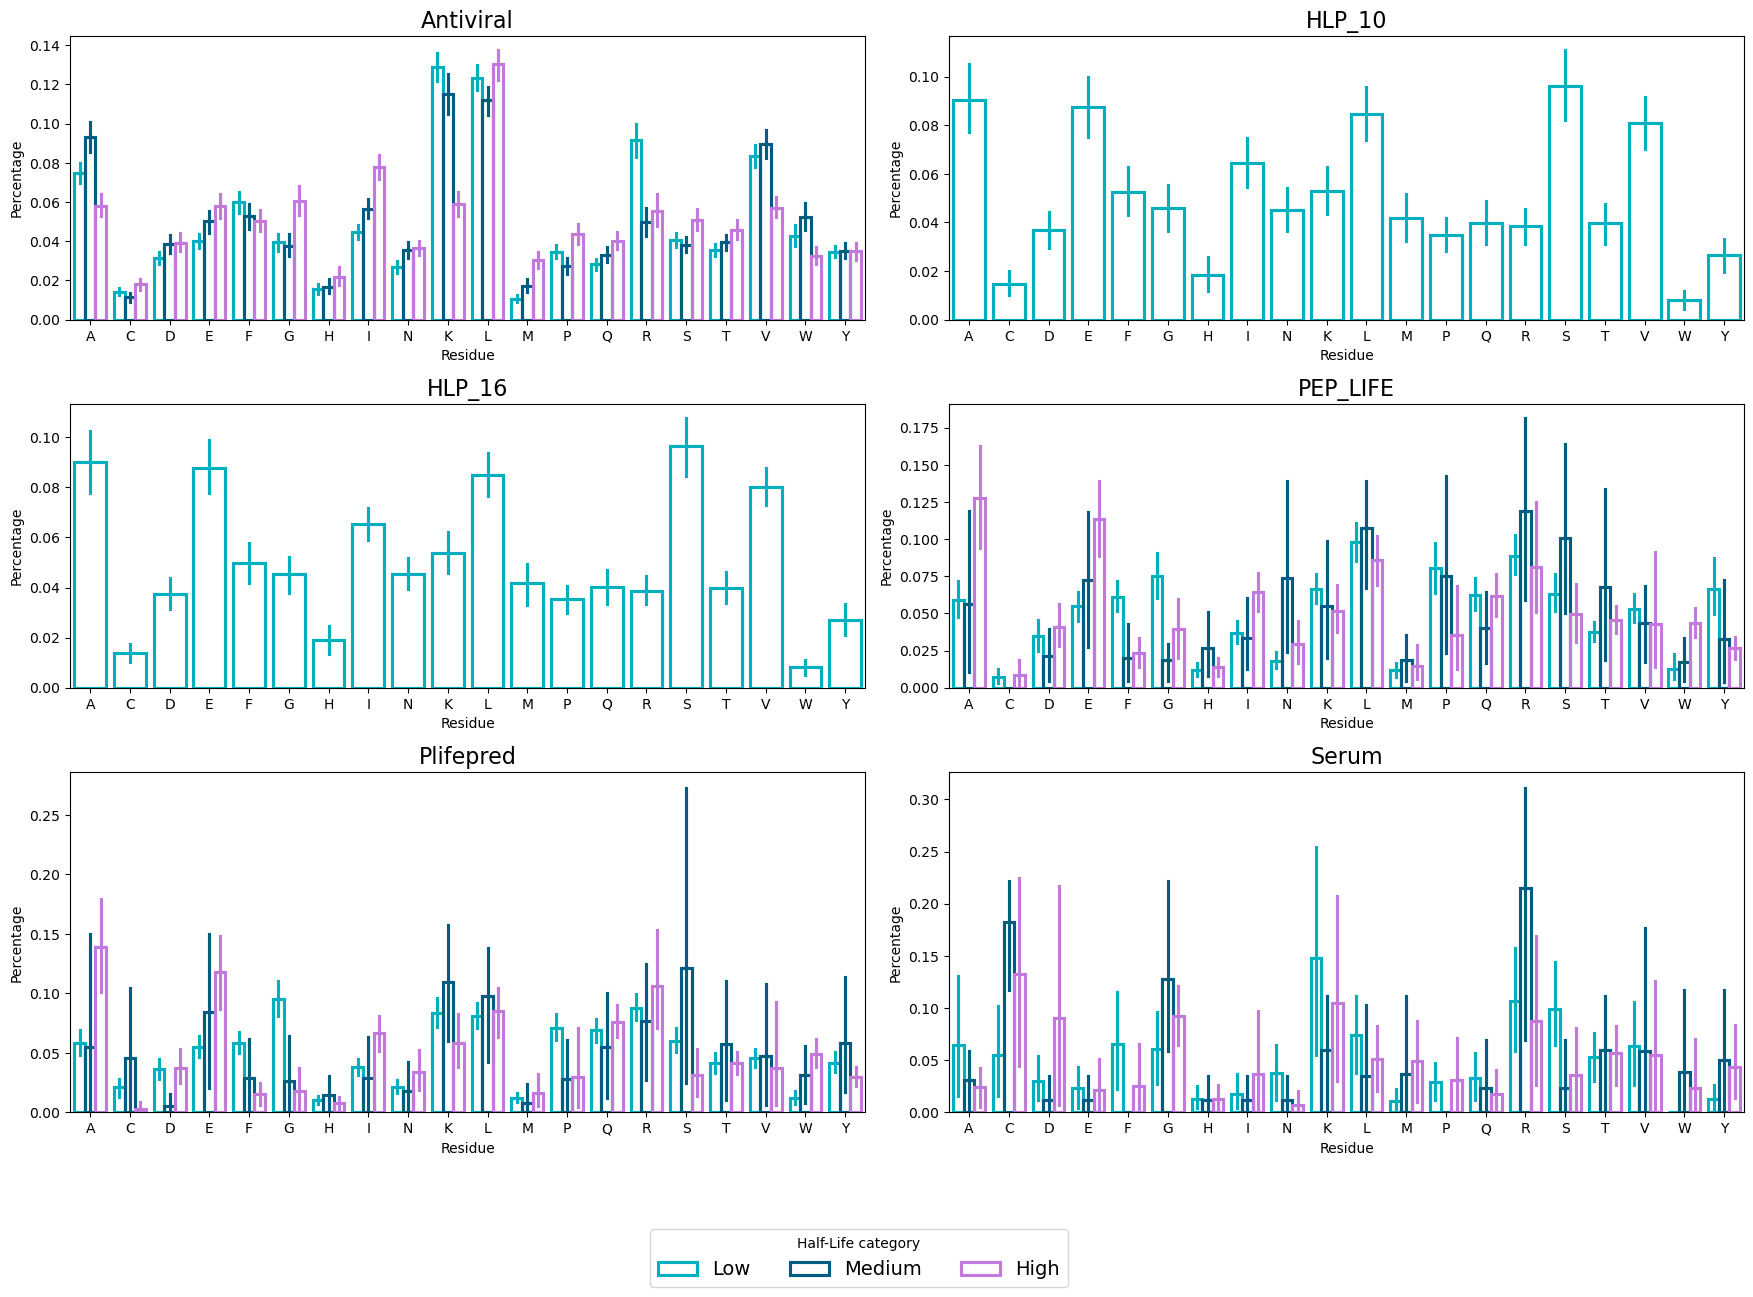

In [15]:
fig = plt.figure(figsize=(18,14))
gs = GridSpec(3, 4, figure=fig, height_ratios=[1, 1, 1.2]) 

ax_data1 = fig.add_subplot(gs[0, :2])
sns.barplot(ax=ax_data1, data=df_process_1, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data1.set_title("Antiviral", fontsize=16)

ax_data2 = fig.add_subplot(gs[0, 2:])
sns.barplot(ax=ax_data2, data=df_process_2, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data2.set_title("HLP_10", fontsize=16)

ax_data3 = fig.add_subplot(gs[1, :2])
sns.barplot(ax=ax_data3, data=df_process_3, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data3.set_title("HLP_16", fontsize=16)

ax_data4 = fig.add_subplot(gs[1, 2:])
sns.barplot(ax=ax_data4, data=df_process_4, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data4.set_title("PEP_LIFE", fontsize=16)

ax_data5 = fig.add_subplot(gs[2, :2])
sns.barplot(ax=ax_data5, data=df_process_5, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data5.set_title("Plifepred", fontsize=16)

ax_data6 = fig.add_subplot(gs[2, 2:])
sns.barplot(ax=ax_data6, data=df_process_6, x="Residue", y="Percentage", hue="hl_category", orient="v", palette=colors_antiviral, fill=False)
ax_data6.set_title("Serum", fontsize=16)

for ax in [ax_data1, ax_data2, ax_data3, ax_data4, ax_data5, ax_data6]:
    ax.legend_.remove()

handles, labels = ax_data1.get_legend_handles_labels() 
fig.legend(handles, labels, loc="lower center", ncol=len(labels), fontsize=14, title="Half-Life category", bbox_to_anchor=(0.5, -0.01))
plt.tight_layout(rect=[0.02, 0.08, 1, 0.92]) 
plt.savefig("../../img/datasets/description_amino_category.png", dpi=300, bbox_inches='tight')
plt.show()

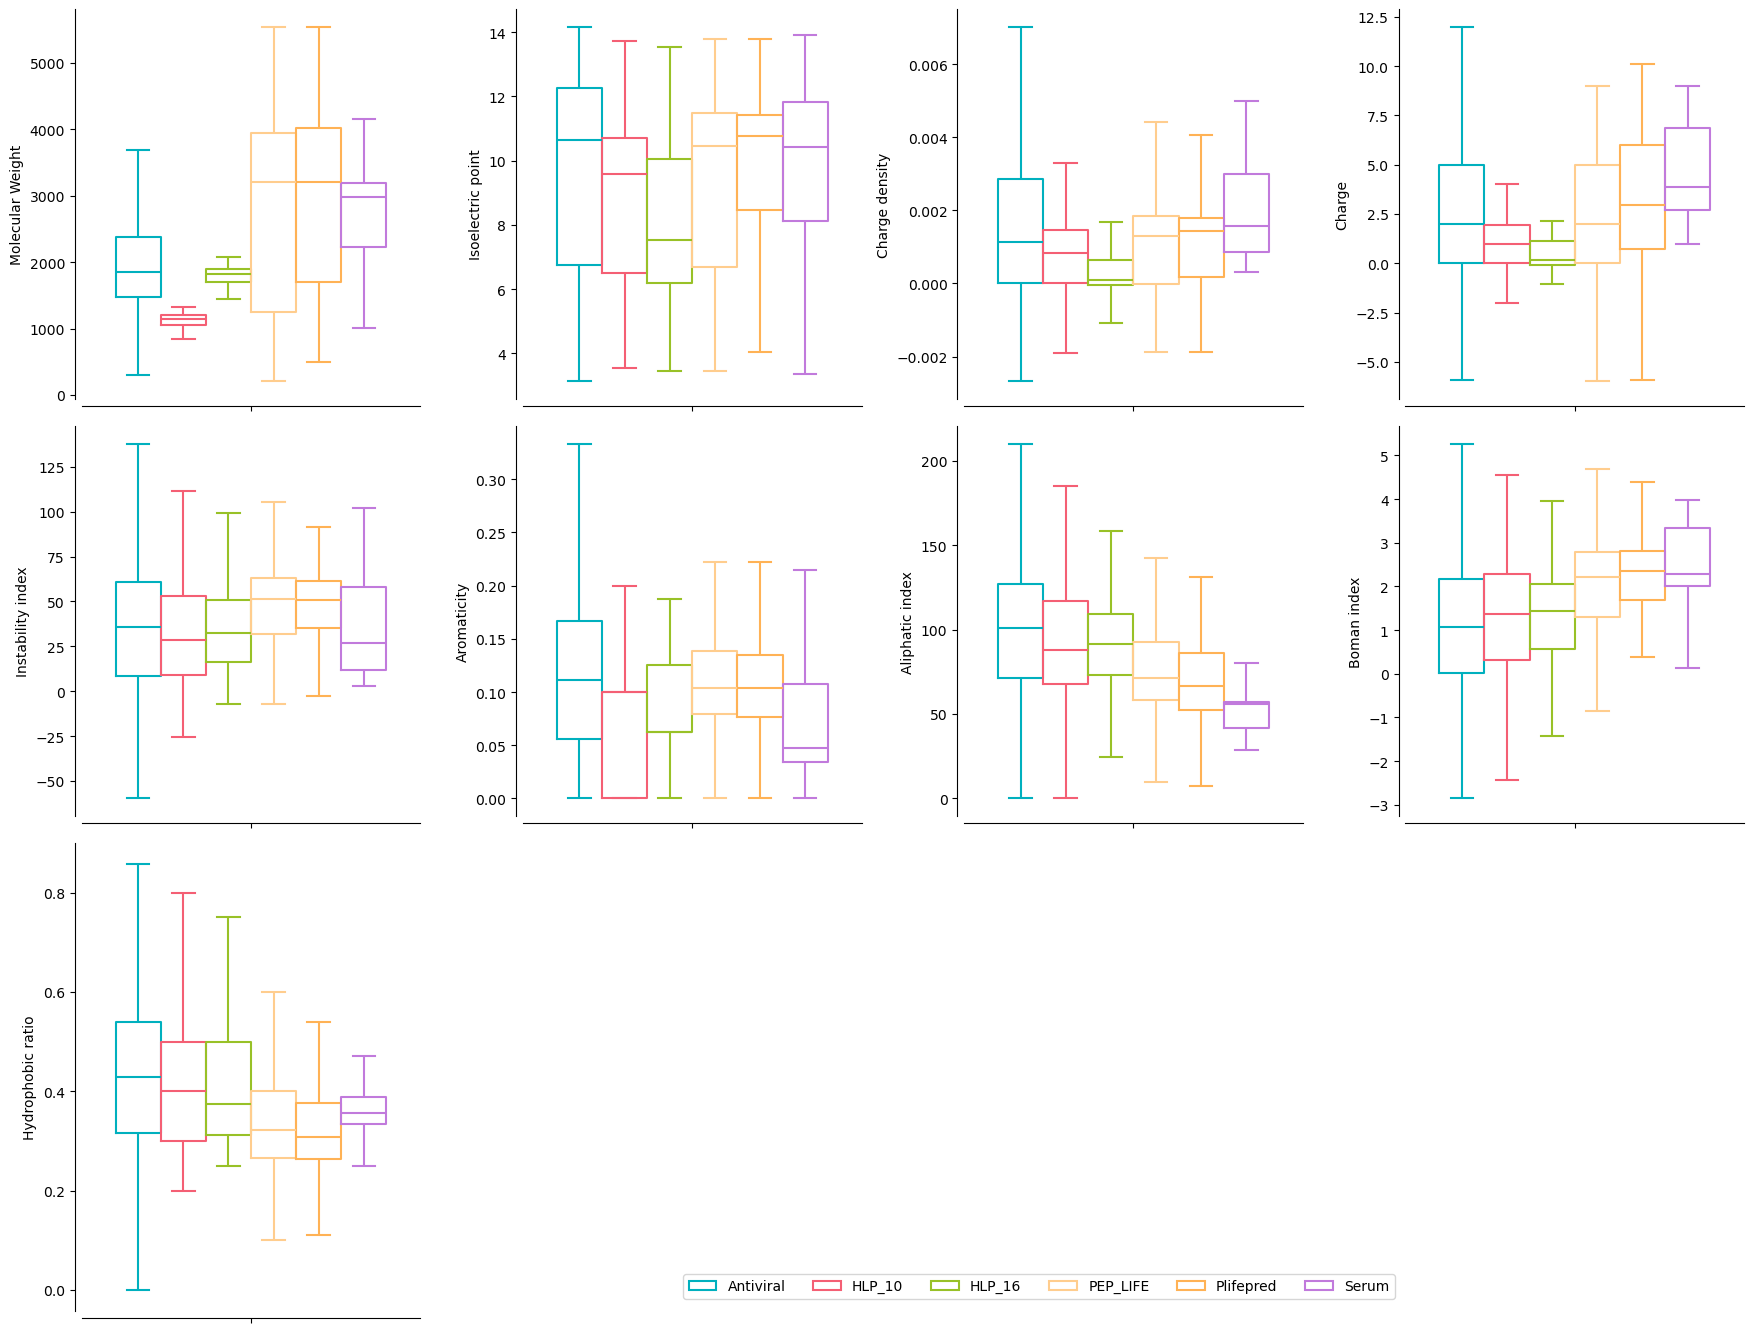

In [16]:
fig = plt.figure(figsize=(18,16))

for i, col in enumerate(columns_with_properties):
    row, col_position = divmod(i, 4)
    ax = fig.add_subplot(gs[row, col_position])
    
    sns.boxplot(ax=ax, data=df_data, y=col, hue="dataset_name", palette=colors2, showfliers=False, fill=False)
    ax.get_legend().remove()  # Eliminamos leyendas individuales

sns.despine(offset=5)

# Añadimos la leyenda común al final de la figura
handles, labels = ax.get_legend_handles_labels()
labels = [label.replace('_canon.csv', '') for label in labels]
fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.6, 0.1))

plt.tight_layout(rect=[0.02, 0.08, 1, 0.92])
plt.savefig("../../img/datasets/description_amino_effects.png", dpi=300, bbox_inches='tight')
plt.show()

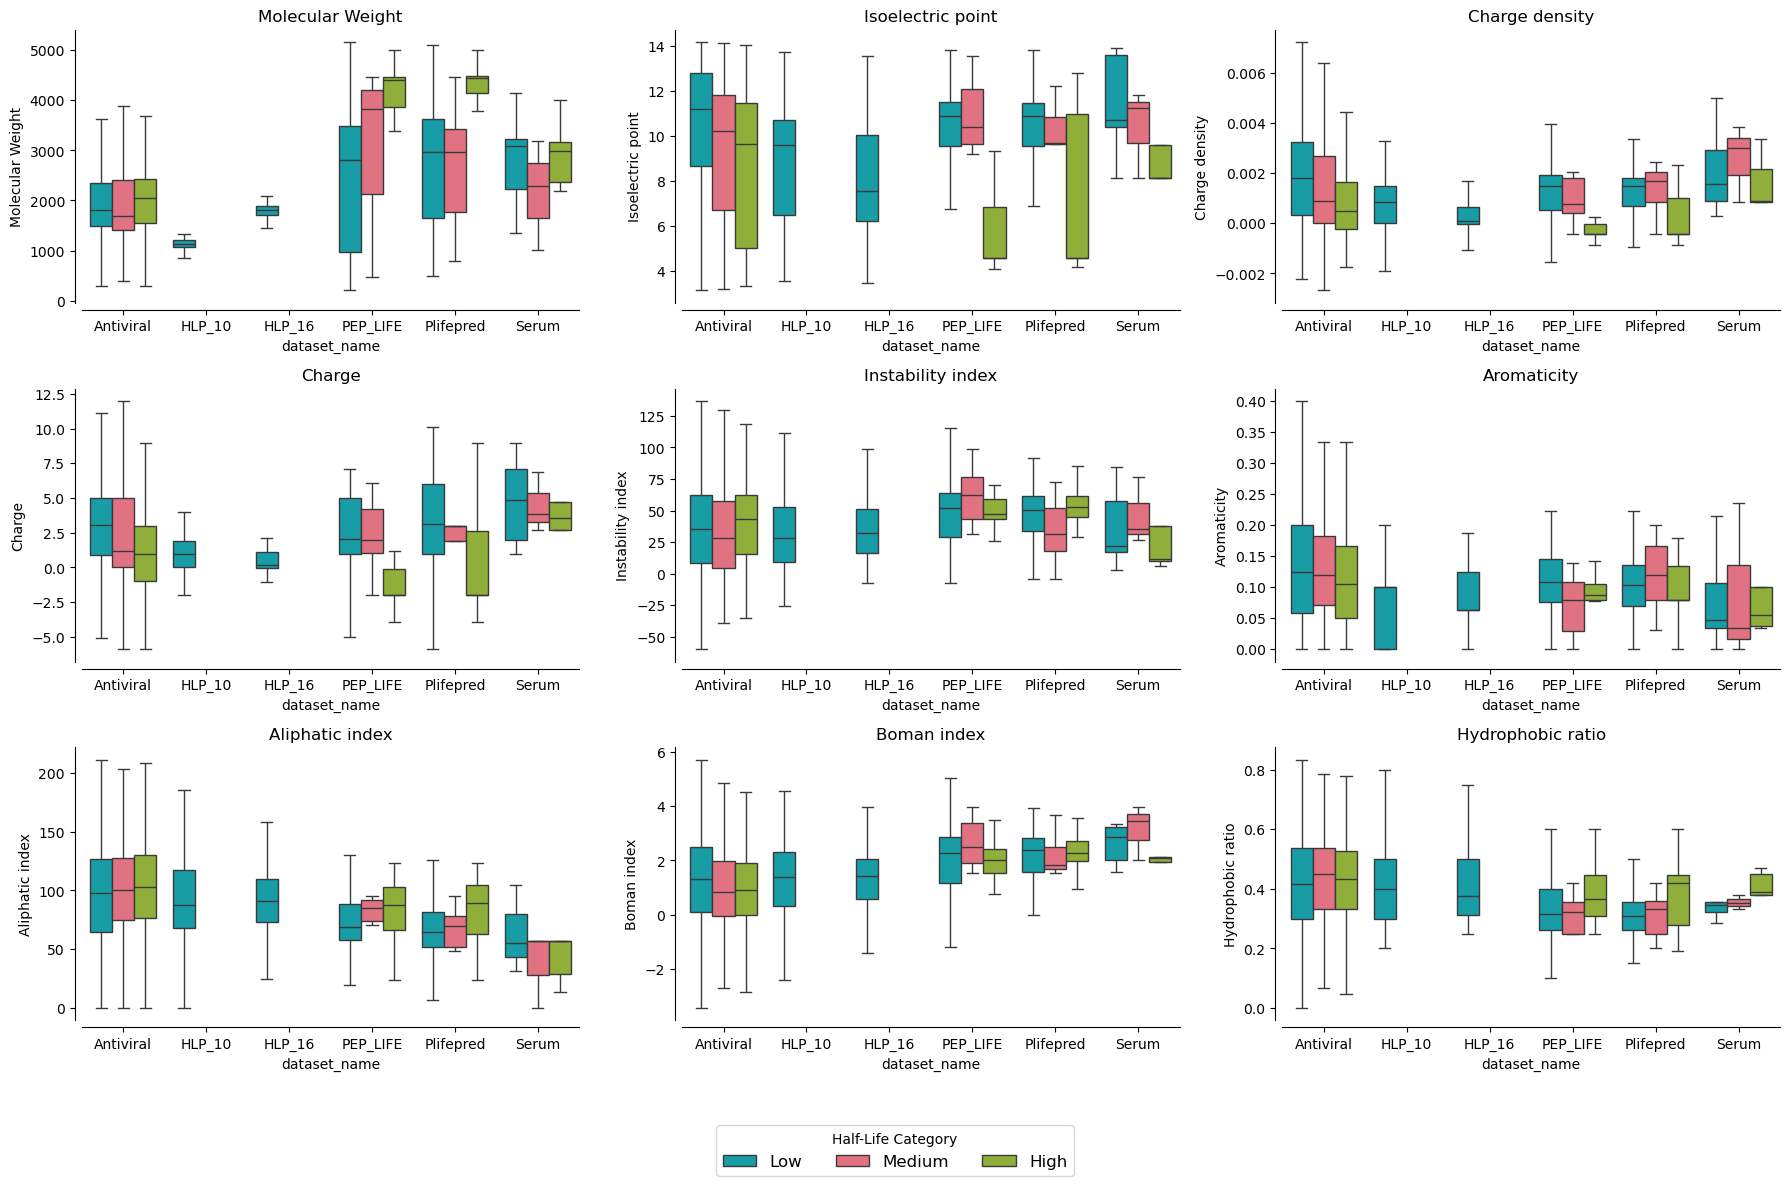

In [17]:
df_data['dataset_name'] = df_data['dataset_name'].str.replace('_canon.csv', '', regex=False)

# Ajustar los gráficos
fig = plt.figure(figsize=(18, 14))
gs = GridSpec(4, 3, figure=fig, height_ratios=[1, 1, 1, 1])  # 4 filas y 3 columnas

for i, col in enumerate(columns_with_properties):
    row, col_position = divmod(i, 3)  # Ahora dividimos entre 3 en lugar de 4
    ax = fig.add_subplot(gs[row, col_position])
    
    # Cambiamos el eje x para usar la columna combinada
    sns.boxplot(
        ax=ax,
        data=df_data,
        x="dataset_name",  # Grupos principales
        y=col,  # Propiedad o característica actual
        hue="hl_category",  # Subcategorías
        hue_order=hl_order,  # Orden de las subcategorías
        palette=colors2,  # Paleta de colores
        showfliers=False
    )
    
    ax.set_title(col, fontsize=12)  # Opcional: Título del subgráfico
    ax.get_legend().remove()  # Eliminamos leyendas individuales

sns.despine(offset=5)

# Añadir leyenda común
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc="lower center",
    ncol=len(labels),
    bbox_to_anchor=(0.5, 0.15),
    fontsize=12,
    title="Half-Life Category"
)

plt.tight_layout()
plt.savefig("../../img/datasets/description_amino_effects_grouped.png", dpi=300, bbox_inches='tight')
plt.show()


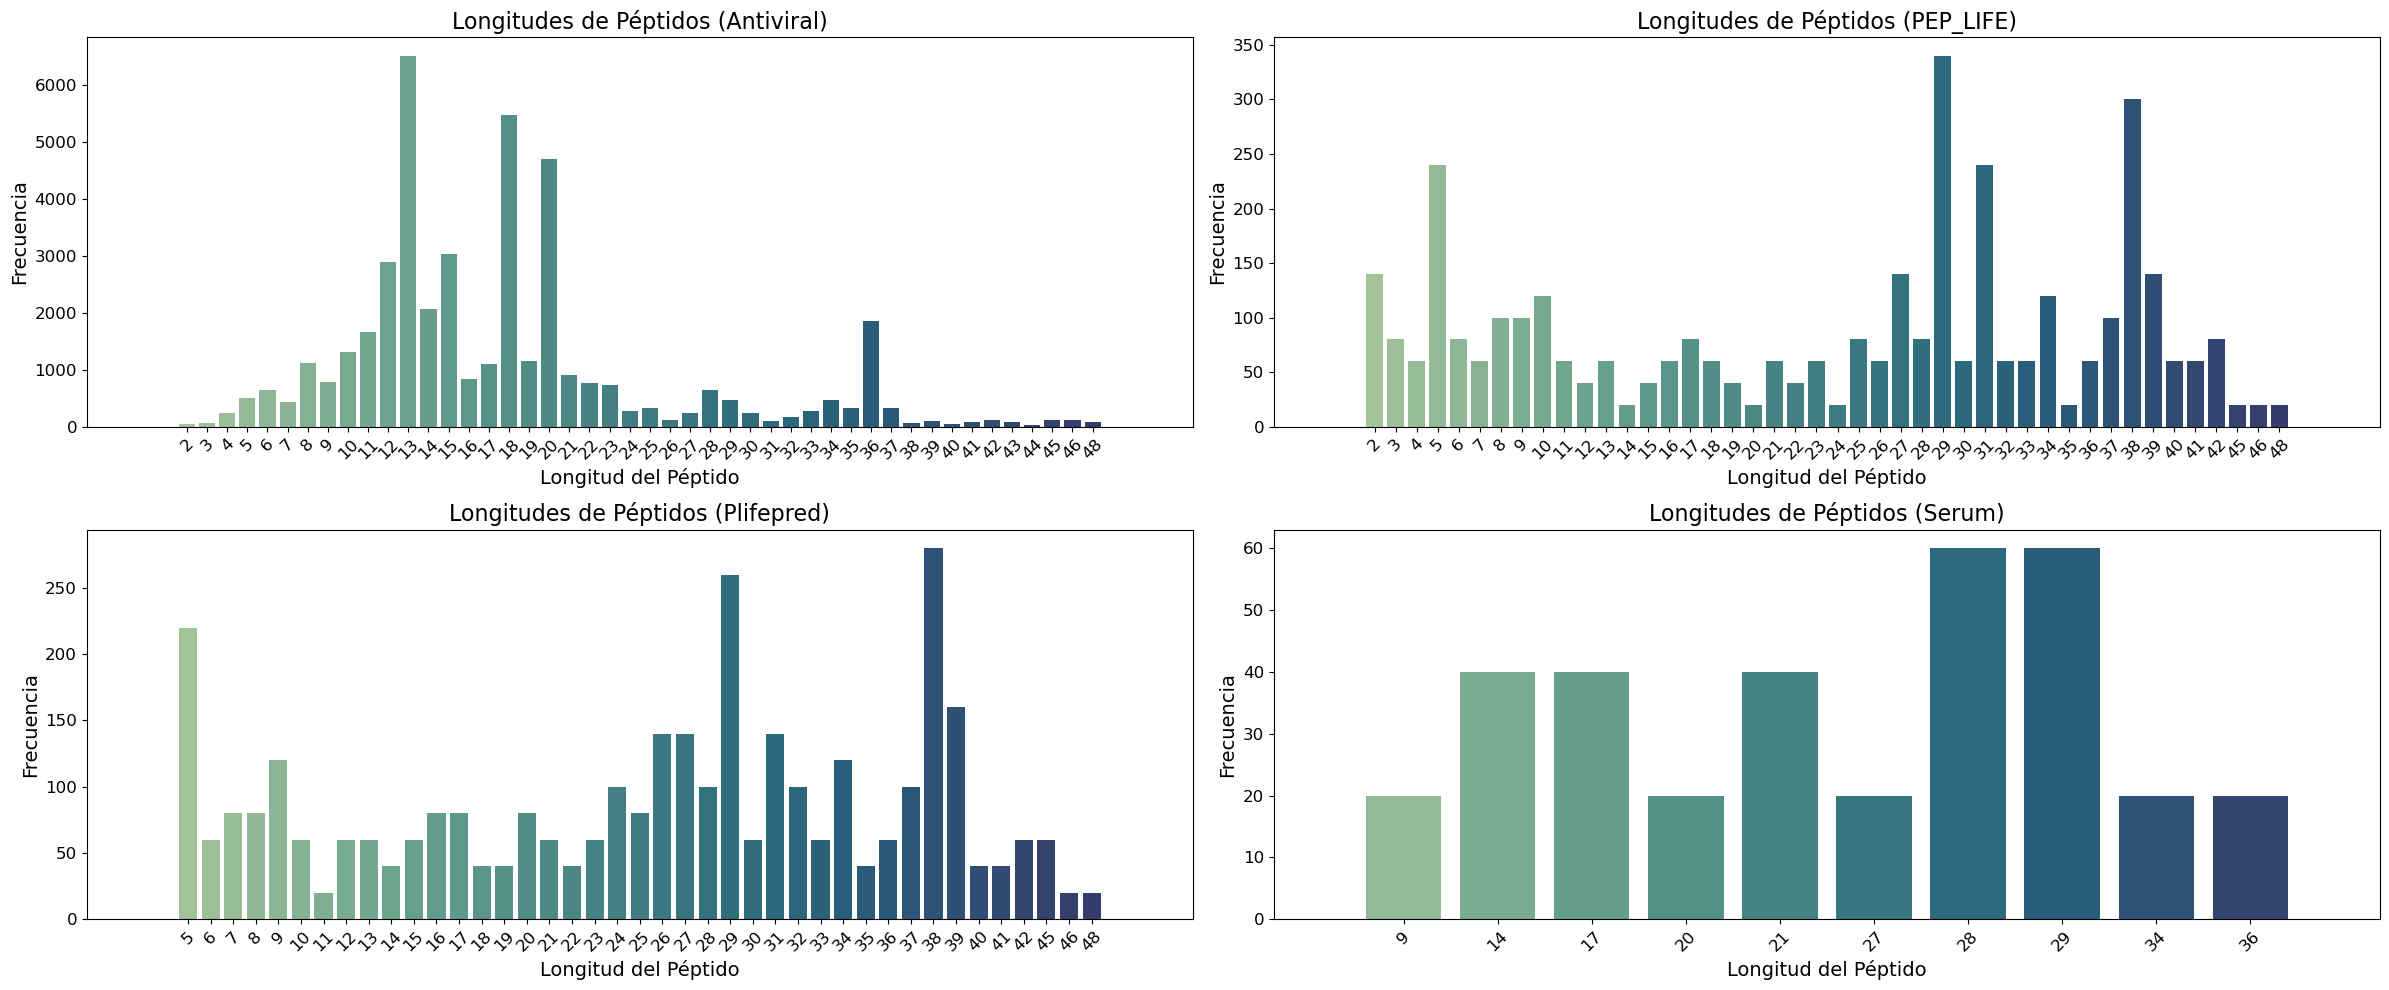

In [18]:
# Lista de datasets a omitir
datasets_to_skip = ["HLP_10", "HLP_16"]

# Filtrar los DataFrames y títulos
filtered_dfs_and_titles = [(df, title) for df, title in zip(list_dfs, list_tittle) if title not in datasets_to_skip]

# Ajustar el número de filas y columnas
n_cols = 2  # Ajusta este número según la cantidad de datasets
n_rows = len(filtered_dfs_and_titles) // n_cols + (len(filtered_dfs_and_titles) % n_cols > 0)  # Calcular el número de filas necesarias

# Crear la figura con los subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 5 * n_rows))  # Ajustar el tamaño según sea necesario
axes = axes.flatten()  # Convertir la matriz de ejes en una lista para facilitar el acceso

# Graficar solo los datasets que no están en la lista de omisión
for idx, (df, title) in enumerate(filtered_dfs_and_titles):
    # Verificar si 'length_sequence' está presente en el dataframe
    if 'length_sequence' not in df.columns:
        print(f"Advertencia: '{title}' no tiene la columna 'length_sequence'")
        continue

    # Contar la cantidad de péptidos por longitud en el dataset específico
    length_counts = df[df["dataset_name"].str.contains(title)]["length_sequence"].value_counts().sort_index()

    # Verificar si se encontraron datos en length_counts
    if length_counts.empty:
        print(f"Advertencia: No se encontraron datos en '{title}' para graficar")
        continue

    # Graficar en el subgráfico correspondiente
    sns.barplot(x=length_counts.index, y=length_counts.values, palette="crest", ax=axes[idx])

    axes[idx].set_xlabel("Longitud del Péptido", fontsize=14)
    axes[idx].set_ylabel("Frecuencia", fontsize=14)
    axes[idx].set_title(f"Longitudes de Péptidos ({title})", fontsize=16)

    # Mejorar visibilidad de las etiquetas en el eje X
    axes[idx].tick_params(axis='x', rotation=45, labelsize=12)  # Rotar y ajustar el tamaño de la fuente
    axes[idx].tick_params(axis='y', labelsize=12)  # Ajustar tamaño de las etiquetas del eje Y

    # Ajustar el espaciado entre las barras y los números del eje X
    axes[idx].margins(x=0.1)  # Añadir márgenes para mejorar el espaciado de las barras

# Eliminar los subgráficos vacíos (si los hay)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

# Guardar la figura completa
plt.savefig("../../img/datasets/length_sequence_distribution_all.png", dpi=300, bbox_inches="tight")
plt.show()


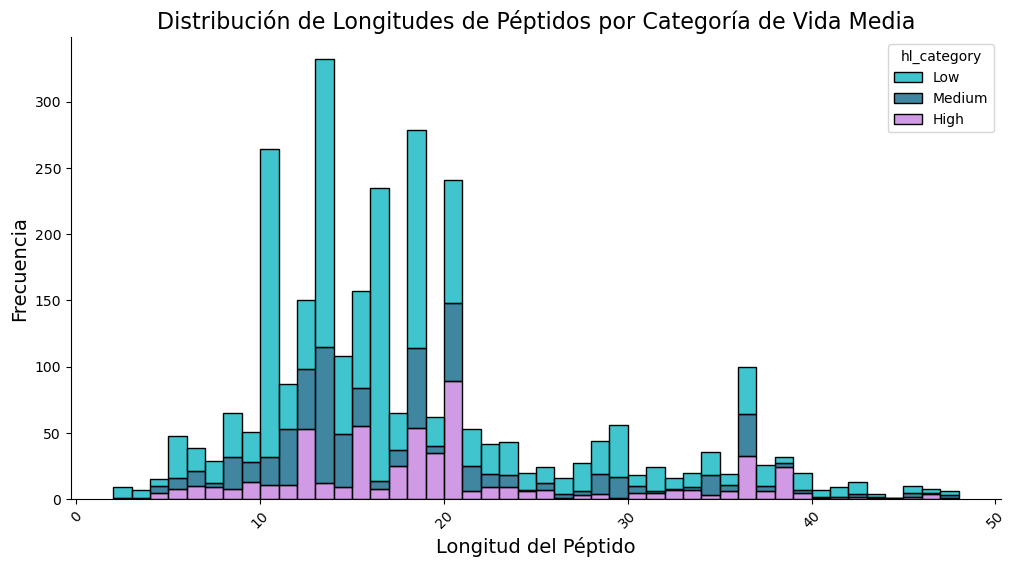

In [19]:
# Graficar
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_data, 
    x="length_sequence", 
    hue="hl_category", 
    hue_order=hl_order,  # Orden correcto
    multiple="stack",  # Apila las barras
    bins=range(df_data["length_sequence"].min(), df_data["length_sequence"].max() + 1), 
    palette=colors_antiviral,
    edgecolor="black"
)

plt.xlabel("Longitud del Péptido", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.title("Distribución de Longitudes de Péptidos por Categoría de Vida Media", fontsize=16)
plt.xticks(rotation=45)
sns.despine()

plt.savefig("../../img/datasets/length_sequence_category.png", dpi=300, bbox_inches="tight")
plt.show()
